<a href="https://colab.research.google.com/github/shinobu357/TugasMLRaisya/blob/main/UAS/Chapter_4_Computer_Vision_Raisya_Athaya_Kamilah_101032380253.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 4 - Multimodal Models

Unit ini mengeksplorasi model multimodal yang dapat memproses dan mengintegrasikan data dari berbagai modalitas, seperti teks dan citra. Model semacam ini memungkinkan aplikasi yang lebih canggih, seperti menghasilkan deskripsi teks dari citra (image captioning). Dengan mengintegrasikan berbagai jenis data, model multimodal ini mampu menangani tugas-tugas yang sebelumnya sulit dilakukan oleh model-model yang hanya fokus pada satu jenis data.


Model multimodal ini menggabungkan informasi dari berbagai sumber untuk menghasilkan output yang lebih kaya dan akurat. Misalnya, dalam penjawaban pertanyaan visual, model dapat menganalisis gambar dan teks secara bersamaan untuk memberikan jawaban yang lebih tepat.

In [14]:
from transformers import pipeline  # Mengimpor fungsi 'pipeline' dari pustaka transformers

# Inisialisasi pipeline image-to-text menggunakan model yang telah dilatih untuk captioning gambar
image_to_text = pipeline("image-to-text", model="nlpconnect/vit-gpt2-image-captioning")

# Menggunakan pipeline untuk menghasilkan caption (teks deskripsi) dari gambar yang diberikan melalui URL
image_to_text("https://ankur3107.github.io/assets/images/image-captioning-example.png")

# Output yang dihasilkan akan berupa daftar yang berisi dictionary dengan caption yang dihasilkan
# [{'generated_text': 'a soccer game with a player jumping to catch the ball '}]


Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "architectures": [
    "ViTModel"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": true,
  "transformers_version": "4.47.1"
}

Config of the decoder: <class 'transformers.models.gpt2.modeling_gpt2.GPT2LMHeadModel'> is overwritten by shared decoder config: GPT2Config {
  "activation_function": "gelu_new",
  "add_cross_attention": true,
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "decoder_start_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_rang

[{'generated_text': 'a soccer game with a player jumping to catch the ball '}]

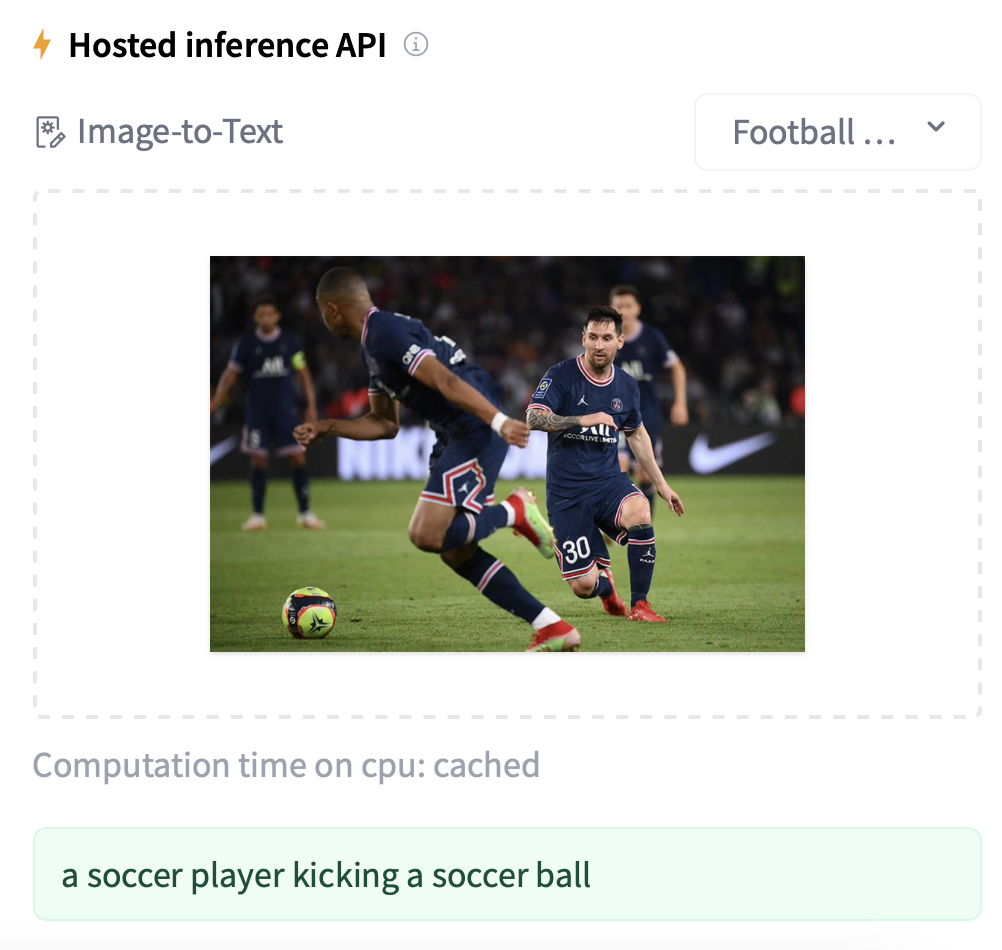

In [13]:
import requests  # Mengimpor pustaka untuk melakukan HTTP requests
from PIL import Image  # Mengimpor pustaka PIL untuk memanipulasi gambar
from transformers import BlipProcessor, BlipForConditionalGeneration  # Mengimpor BlipProcessor dan BlipForConditionalGeneration dari transformers

# Memuat model BLIP (BLIP-image-captioning-large) dan preprocessor-nya
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large")

# Mendownload gambar dari URL dan membuka gambar tersebut
img_url = "https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg"
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert("RGB")

# Captioning gambar dengan kondisi teks yang diberikan
text = "a photography of"  # Teks yang diberikan untuk kondisional captioning
inputs = processor(raw_image, text, return_tensors="pt")  # Memproses gambar dan teks menjadi input tensor untuk model

out = model.generate(**inputs)  # Menghasilkan caption berdasarkan gambar dan teks input
print(processor.decode(out[0], skip_special_tokens=True))  # Mengubah hasil output menjadi teks yang dapat dibaca

# Captioning gambar tanpa kondisi teks (unconditional)
inputs = processor(raw_image, return_tensors="pt")  # Memproses gambar saja untuk unconditional captioning

out = model.generate(**inputs)  # Menghasilkan caption tanpa teks kondisional
print(processor.decode(out[0], skip_special_tokens=True))  # Mengubah hasil output menjadi teks yang dapat dibaca


preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/527 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.60k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

a photography of a woman and her dog on the beach
woman sitting on the beach with her dog and a cell phone


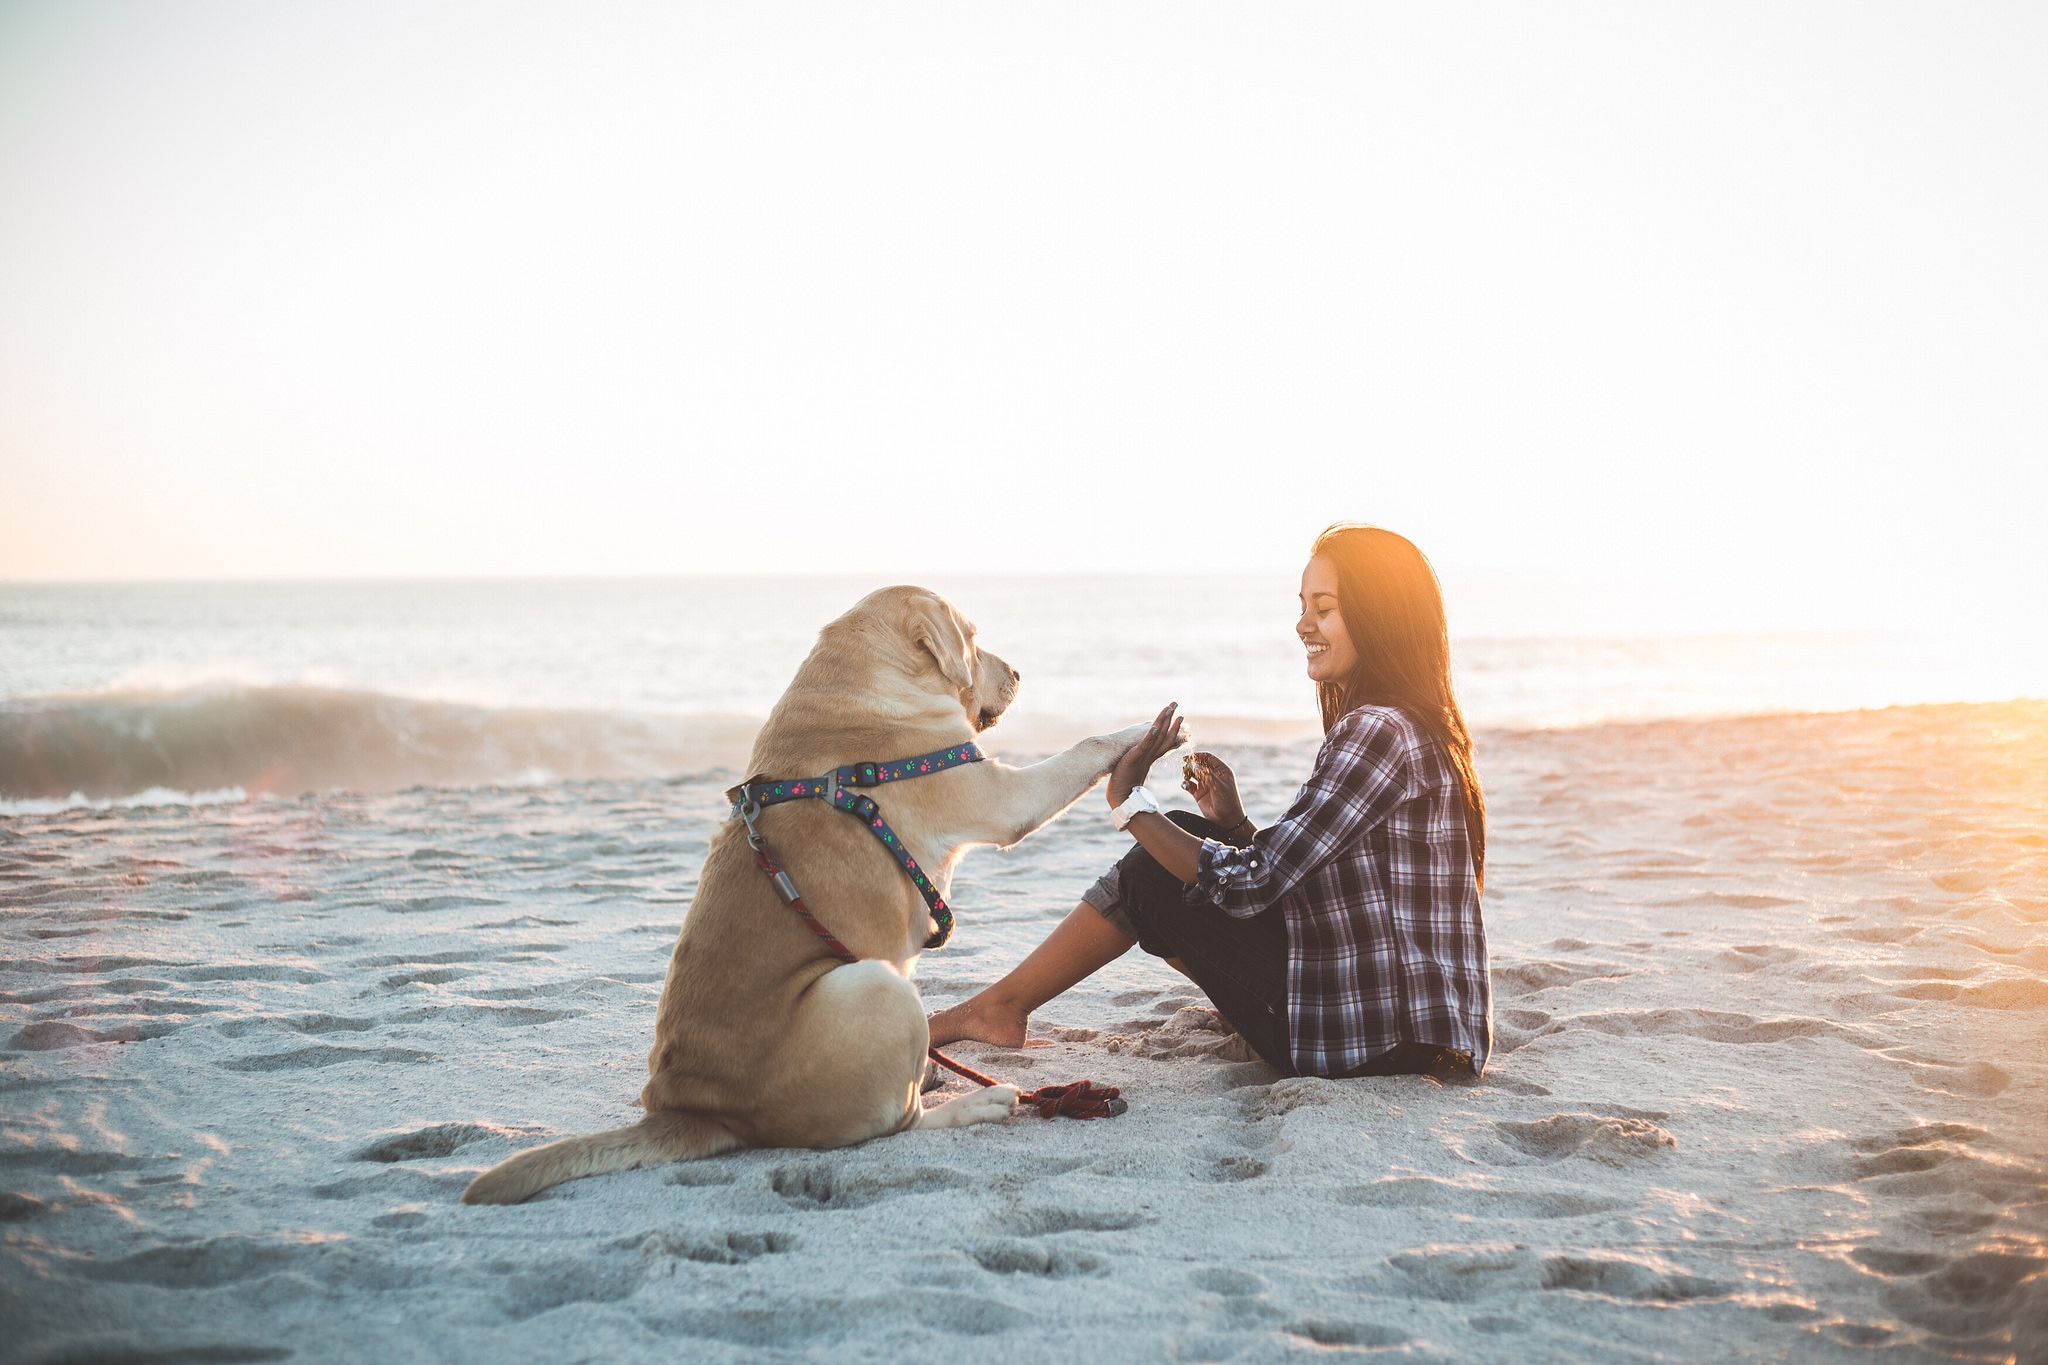

# Contrastive Language-Image Pre-training (CLIP)

Contrastive Language-Image Pre-training (CLIP) adalah model yang dikembangkan oleh OpenAI untuk menghubungkan teks dan gambar dalam satu ruang representasi bersama. CLIP dilatih dengan pasangan gambar dan teks dari internet, memungkinkan model untuk memahami dan menghubungkan konsep visual dengan deskripsi teks secara efektif.

In [2]:
from PIL import Image  # Mengimpor modul untuk manipulasi gambar
import requests  # Mengimpor modul untuk melakukan HTTP requests

from transformers import CLIPProcessor, CLIPModel  # Mengimpor model dan processor CLIP dari transformers

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")  # Memuat model CLIP pre-trained
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")  # Memuat processor CLIP pre-trained

url = "http://images.cocodataset.org/val2017/000000039769.jpg"  # URL gambar untuk digunakan sebagai input
image = Image.open(requests.get(url, stream=True).raw)  # Mengunduh dan membuka gambar dari URL

inputs = processor(
    text=["a photo of a cat", "a photo of a dog"],  # Teks yang akan dibandingkan dengan gambar
    images=image,  # Gambar yang akan diproses
    return_tensors="pt",  # Mengonversi input menjadi tensor PyTorch
    padding=True,  # Menambahkan padding pada input jika diperlukan
)

outputs = model(**inputs)  # Memberikan input ke model dan memperoleh output
logits_per_image = outputs.logits_per_image  # Mengambil skor logits untuk gambar
probs = logits_per_image.softmax(dim=1)  # Menghitung probabilitas menggunakan softmax


# Bootstrapping Language-Image Pretraining (BLIP)

BLIP (Bootstrapping Language-Image Pretraining) adalah model multimodal yang menggabungkan pemrosesan gambar dan teks untuk meningkatkan kemampuan generasi teks dari gambar. BLIP bertujuan untuk mempelajari representasi bersama dari gambar dan teks yang dapat digunakan untuk berbagai tugas multimodal. Salah satunya adalah menghasilkan deskripsi teks dari gambar(Image Captioning)

In [1]:
# Import libraries yang dibutuhkan
from PIL import Image  # Untuk memanipulasi gambar
import requests  # Untuk mengunduh gambar dari URL
from transformers import Blip2Processor, Blip2ForConditionalGeneration  # Mengimpor BLIP2 processor dan model untuk generasi teks berbasis gambar
import torch  # Untuk pemrosesan menggunakan PyTorch

# Menentukan perangkat (GPU atau CPU) untuk pemrosesan
device = "cuda" if torch.cuda.is_available() else "cpu"  # Memilih perangkat GPU jika tersedia, jika tidak CPU

# Memuat BLIP2 Processor dan Model dengan pre-trained weights
processor = Blip2Processor.from_pretrained("Salesforce/blip2-opt-2.7b")  # Memuat processor untuk memproses gambar dan teks
model = Blip2ForConditionalGeneration.from_pretrained(
    "Salesforce/blip2-opt-2.7b", torch_dtype=torch.float16  # Memuat model BLIP2 dengan tipe data float16 untuk efisiensi memori
)
model.to(device)  # Memindahkan model ke perangkat yang dipilih (GPU atau CPU)

# Mengunduh gambar dari URL
url = "http://images.cocodataset.org/val2017/000000039769.jpg"  # URL gambar untuk diproses
image = Image.open(requests.get(url, stream=True).raw)  # Mengunduh dan membuka gambar

# Menyusun teks prompt yang akan digunakan untuk mengajukan pertanyaan tentang gambar
prompt = "Question: How many remotes are there? Answer:"  # Pertanyaan yang diajukan mengenai gambar

# Mengonversi gambar dan teks menjadi format yang diterima oleh model
inputs = processor(images=image, text=prompt, return_tensors="pt").to(
    device, torch.float16  # Menyiapkan input dan memindahkannya ke perangkat yang dipilih dengan tipe data float16
)

# Menyaring output dari model untuk menghasilkan jawaban berdasarkan input
outputs = model.generate(**inputs)  # Menghasilkan output berupa teks dari model
text = processor.tokenizer.batch_decode(outputs, skip_special_tokens=True)  # Mendekode hasil output menjadi teks yang bisa dibaca

# Menampilkan hasil jawaban
print(text)  # Menampilkan jawaban yang dihasilkan oleh model


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

['Question: How many remotes are there? Answer: Two\n']


# Multimodal Object Detection (OWL-ViT)


OWL-ViT (Vision Transformer untuk Open-World Localization) adalah model deteksi objek multimodal yang memungkinkan deteksi objek dalam gambar menggunakan deskripsi teks tanpa memerlukan pelatihan khusus untuk setiap kategori objek. Model ini menggabungkan kemampuan CLIP dalam memahami hubungan antara gambar dan teks dengan arsitektur Vision Transformer (ViT) untuk menghasilkan representasi visual yang kuat

Detected remote control with confidence 0.328 at location [40.03, 72.43, 177.76, 115.58]
Detected remote control with confidence 0.159 at location [335.71, 74.17, 371.88, 187.55]
Detected a photo of a cat with confidence 0.707 at location [324.97, 20.44, 640.58, 373.29]
Detected a photo of a cat with confidence 0.717 at location [1.46, 55.26, 315.55, 472.17]
Detected cat tail with confidence 0.121 at location [142.39, 285.1, 219.42, 344.96]


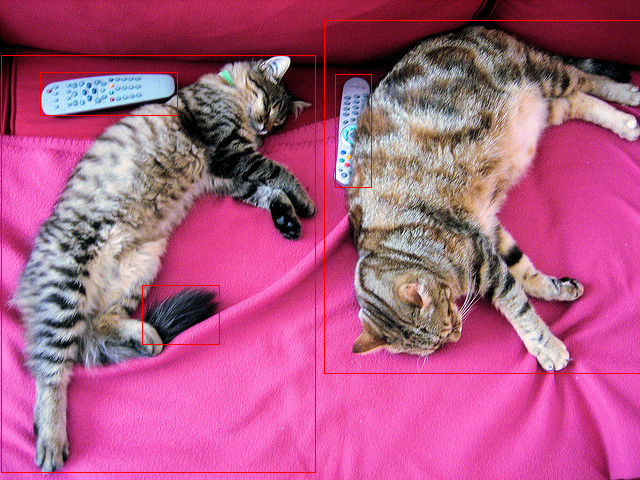

In [19]:
import requests
from PIL import Image, ImageDraw
import torch
from transformers import OwlViTProcessor, OwlViTForObjectDetection

# Memuat processor dan model OWL-ViT
processor = OwlViTProcessor.from_pretrained("google/owlvit-base-patch32")
model = OwlViTForObjectDetection.from_pretrained("google/owlvit-base-patch32")

# Memuat gambar dari URL
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)  # Mengambil gambar dari URL dan membuka gambar

# Teks deskripsi objek yang ingin dideteksi
texts = [["a photo of a cat", "a photo of a dog", "remote control", "cat tail"]]

# Memproses input: teks dan gambar
inputs = processor(text=texts, images=image, return_tensors="pt")

# Melakukan inferensi untuk deteksi objek
outputs = model(**inputs)

# Menentukan ukuran target untuk pemrosesan hasil deteksi objek
target_sizes = torch.Tensor([image.size[::-1]])

# Proses hasil deteksi objek dengan ambang batas 0.1
results = processor.post_process_object_detection(
    outputs=outputs, target_sizes=target_sizes, threshold=0.1
)

i = 0  # Mengambil hasil prediksi untuk gambar pertama berdasarkan teks yang diberikan
text = texts[i]

# Mengambil bounding box, skor, dan label dari hasil deteksi
boxes, scores, labels = results[i]["boxes"], results[i]["scores"], results[i]["labels"]

# Membuat objek untuk menggambar pada gambar
draw = ImageDraw.Draw(image)

# Menggambar setiap bounding box pada gambar
for box, score, label in zip(boxes, scores, labels):
    box = [round(i, 2) for i in box.tolist()]  # Membulatkan koordinat box
    print(
        f"Detected {text[label]} with confidence {round(score.item(), 3)} at location {box}"
    )
    # Menggambar kotak merah di sekitar objek yang terdeteksi
    draw.rectangle(box, outline="red")

# Menampilkan gambar setelah penggambaran kotak
image
